In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
EPOCHS = 20


In [2]:
#czemu ta komórka jest istotna?
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

255 to największa wartość w tym zbiorze - dlatego dzielimy przez nią

ta komórka nam skaluje - dzieli przez 255 - musimy dać znać numpy'owi, że chcemy dostać liczbę rzeczywistą, a nie 0 (bo czasem jak się dzieli przez liczbę mniejszą to on wypluwa 0)

In [3]:
#stwórz sieć neuronową. Pierwsza warstwa już jest. Następnie dodaj warstwę Dense o 128 neuronach i funkcji aktywacji
#relu. Ostatnia warstwa, też Dense, powinna mieć neuronów tyle ile jest klas w zbiorze y_train i funkcję aktywacji
#softmax. Funkcja straty to tym razem 'sparse_categorical_crossentropy'

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=(28,28))) 
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


flatten - funkcja, która wypłaszcza dane, bo mieliśmy je podane w postaci macierzy, a potrzebujemy wektora
sparse categorical crossentropy - jeśli labele to cyfry to z niej korzystamy; i wtedy f.aktwacji w ostatniej warstwie to softmax
categorical crossentropy - jeśli są w formie [0, 0, 0, 0, 1, 0] i tam gdzie jest 1 tam jest dany label (tu też softmax)
binary crossentropy - w przypadku kiedy labele to 0/1 i dostajemy np. [0], wtedy funkcją aktywacji będzie sigmoid
(te funkcje tak naprawdę mają taki sam kształt)

In [4]:
#uruchom uczenie sieci
history = model.fit(x_train, y_train, epochs = EPOCHS, validation_data=(x_test, y_test), callbacks = [es])

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2546 - accuracy: 0.9267 - val_loss: 0.1399 - val_accuracy: 0.9575
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1097 - accuracy: 0.9676 - val_loss: 0.1001 - val_accuracy: 0.9678
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0753 - accuracy: 0.9773 - val_loss: 0.0850 - val_accuracy: 0.9752
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0564 - accuracy: 0.9830 - val_loss: 0.0807 - val_accuracy: 0.9753
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0445 - accuracy: 0.9863 - val_loss: 0.0776 - val_accuracy: 0.9769
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0345 - accuracy: 0.9892 - val_loss: 0.0815 - val_accuracy: 0.9754
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0277 - accuracy: 0.9911 - val_loss: 0.0727 - val_accuracy:

In [5]:
#przygotuj wykresy funkcji straty i skuteczności
hist = pd.DataFrame(history.history)
hist

,loss,accuracy,val_loss,val_accuracy
0,0.254576,0.926700,0.139857,0.9575
1,0.109706,0.967617,0.100050,0.9678
2,0.075272,0.977283,0.084958,0.9752
3,0.056422,0.983017,0.080680,0.9753
4,0.044450,0.986300,0.077595,0.9769
5,0.034481,0.989183,0.081485,0.9754
6,0.027669,0.991100,0.072699,0.9794
7,0.021523,0.993367,0.079780,0.9772
8,0.019312,0.993817,0.088079,0.9766
9,0.016358,0.994617,0.079772,0.9781


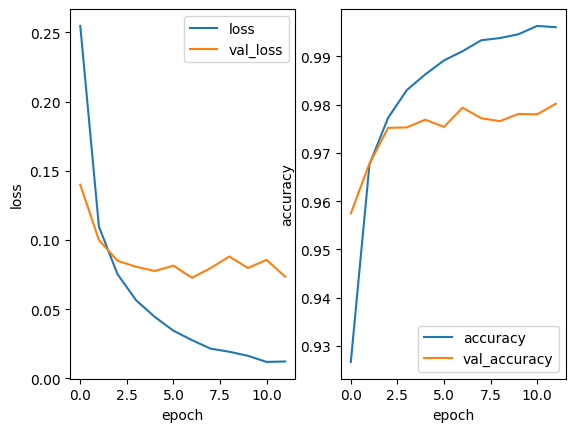

In [6]:
plt.subplot(1,2,1)
plt.plot(hist.loss, label = "loss")
plt.plot(hist.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist.accuracy, label = "accuracy")
plt.plot(hist.val_accuracy, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

In [7]:
y_pred = model.predict(x_test)

313/313 [==============================] - 0s 818us/step


[9.3488273e-10 6.3675681e-14 3.5731876e-08 2.8362305e-05 1.3147238e-14
 1.6856438e-12 6.0368096e-16 9.9996740e-01 1.3080763e-09 4.1539811e-06]


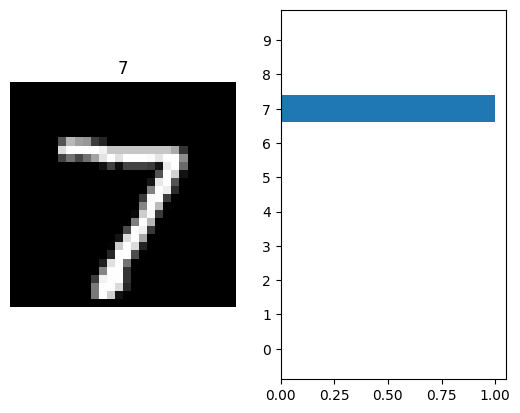

In [8]:
plt.subplot(1,2,1)
plt.imshow(x_test[0], cmap="gray")
plt.axis('off')
plt.title(y_test[0])

plt.subplot(1,2,2)
plt.barh(np.arange(10), y_pred[0])
plt.yticks(np.arange(10))
print(y_pred[0])

tu są podane kolejne prawdopodobieństwa, z jakimi dany element należy do odpowiednich klas (w tej macierzy i mean

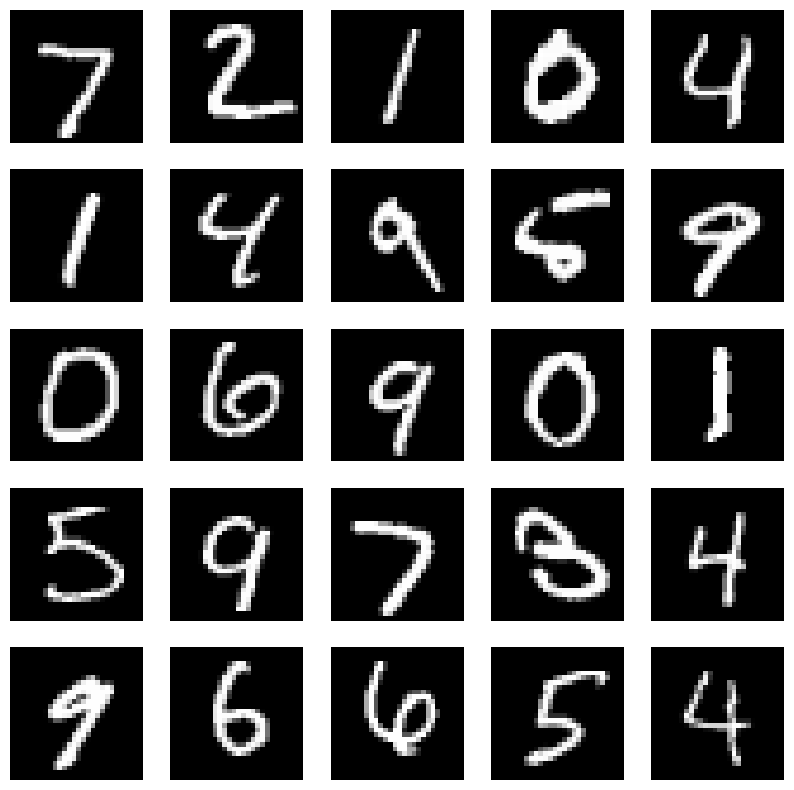

In [9]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.axis('off')

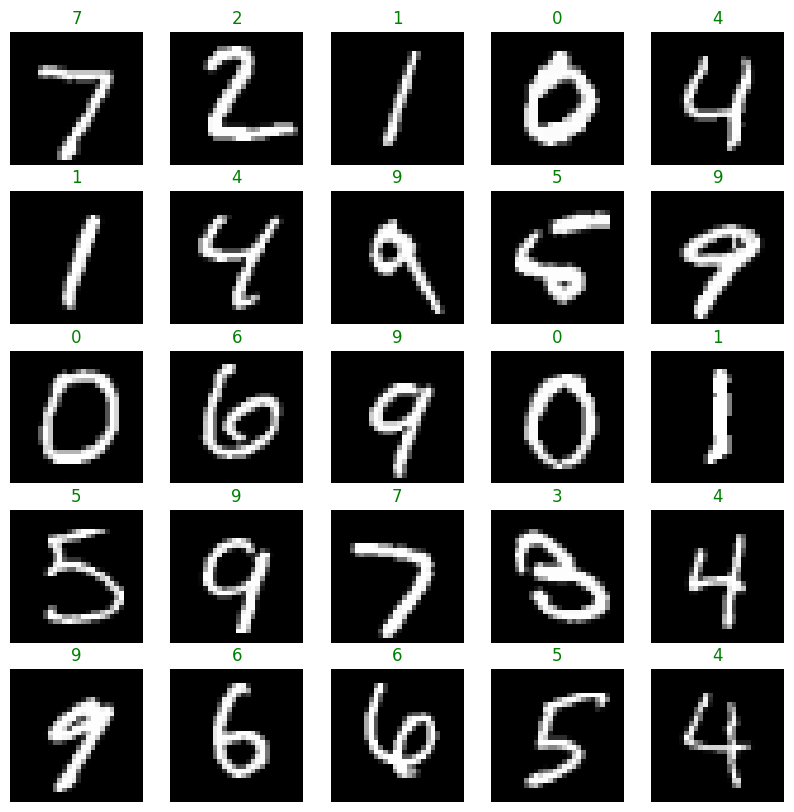

In [15]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.axis('off')
    if np.argmax(y_pred[i]) == y_test[i]:
        plt.title(y_test[i], color = 'green')
    else: 
        plt.title(str(np.argmax(y_pred[i]))+" "+str(y_test[i]), color = 'red') #w przypadku podania złej odpowiedzi chce 
        #wyświetlić i klasę, którą on podał i tę prawidłową, w pozostałych wyświetlam tylko prawidłową (bo zgadł, więc to ta sama)